In [11]:
%matplotlib inline
import pylab as pl
import numpy as np
from astropy import units as u, constants, visualization
visualization.quantity_support()
pl.style.use('dark_background')
pl.rcParams['figure.figsize'] = (10,8)
pl.rcParams['font.size'] = 16

# Lecture - Spectroscopy,  quantitatively

In this lecture, we'll revisit several spectroscopy concepts.

I refer to several sources:

* C.R. Kitchin "Astrophysical Techniques" 7th Edition](http://dl.booktolearn.com/ebooks2/science/astronomy/9781138590168_Astrophysical_Techniques_7th_42fe.pdf)
* Stuart Littlefair's Physics 217 lectures: [Lecture 16](http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L16/) [Lecture 17](http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L17/index.html)

Goals:

 * Determine the spectral resolution of a spectrograph
 * Learn how resolution depends on different properties of the spectrograph and optical system

## Resolution

We have several equivalent definitions of spectral resolution that are all equivalent:

$$ R = \frac{\nu}{\Delta \nu} $$

$$ R = \frac{\lambda}{\Delta\lambda} $$

$$ R = \frac{c}{v} $$

We'll now derive the resolution for a given grating.

## Grating Equation

The Grating Equation, which determines where constructive interference occurs, is:

$$ n \lambda = D \sin \theta $$

where

 * $n$ is the order number and must be an integer
 * $\lambda$ is the wavelength
 * $D$ is the distance between holes (gaps) in the grating
 * $\theta$ is the angle defined such that $\theta=0$ is perpendicular to the grating (or parallel to the direction of the light) 
 
If $n$ is not an integer, there is instead destructive interference and we see an absence of light.

## Grating Equation: $ n \lambda = d \sin \theta $

<img src="images/grating_littlefair_whitebg.png" style="float:left; max-height:500px">
<img src="images/grating_littlefair_whitebg_two.png" style="float:right; max-height:500px">



## Grating Equation: $ n \lambda = D \sin \theta $, $\theta=0$

What happens at $\theta = 0^\circ$?

$n \lambda = 0$, so $n=0$, since all wavelength are positive.

This defines 0-order.  All wavelengths constructively interfere

## Grating Equation: $ n \lambda = D \sin \theta $, $\theta=30$

What happens at $\theta =$ some other angle, say $\theta= 30^\circ$? 

($0^\circ$ was special, 30$^\circ$ is not)



$n \lambda = D \sin 30^\circ$, so $n \lambda=D / 2$

## Grating Equation: $ n \lambda = D \sin \theta $, $\theta=30$


Now this example depends on physical parameters.

Let's say we have a gap separation of $D=0.1$ mm, and we observe at a wavelength $\lambda = 500$ nm.  Then, in order for the 
grating equation to hold true, we need $n = D / 2 / \lambda$, or $n=100$ (see next slide for the code doing the math)

In [12]:
from astropy import units as u

In [13]:
# note where there are parentheses
order_number = (0.1*u.mm) / 2 / (500*u.nm)
order_number

<Quantity 0.0001 mm / nm>

In [14]:
# in this case "decompose" divides mm by nm, which is 10^6, and converts to unitless
order_number.decompose()

<Quantity 100.>

What if we look at the same example, $d=0.1$ mm, $\theta=30^\circ$, but $\lambda=510$ nm?

In [15]:
order_number = (0.1*u.mm) / 2 / (510*u.nm)
order_number.decompose()

<Quantity 98.03921569>

This number, 98.04, is not an integer, so there will not be constructive interference.  

Gratings are rarely operated at high orders like this, but sometimes Echelle spectrographs will use such high orders.

Usually we stick to $n=1,2,3$

# Grating Equation: Dispersion

How much is the light spread out?  We can determine this by taking the derivative of the grating equation:

$$ n \lambda = D \sin \theta $$


We take the derivative $\frac{d}{d \theta}$, treating $\lambda$ as $\lambda(\theta)$:

$$ n \frac{d \lambda}{d \theta} = D \frac{d \sin \theta}{d \theta} = D \cos \theta$$



$$ \frac{d \lambda}{d \theta} = \frac{D \cos \theta}{n}$$

or equivalently

$$ \frac{d  \theta}{d\lambda} = \frac{n}{D \cos \theta}$$

# Angular Dispersion $$ \frac{d  \theta}{d\lambda} = \frac{n}{D \cos \theta}$$

<div>
    <div style='float:left;'>
This equation gives the change in angle expected as a function of wavelength - it tells you how far separated different wavelengths will be in angle.
    </div>

<img src="images/grating_littlefair_whitebg_two.png" style="float:right; max-height:500px">
    </div>


We would like to know, though, how far apart the wavelengths will be on our detector. 

In other words, for a detector position $x$, we want to know $\frac{dx}{d\lambda}$ or  $\frac{\Delta x}{\Delta\lambda}$ .



Recall that the size of the image made by the camera is
$$s_{ize~of~image} = x = f_{ocal~length} \sin \theta \approx f_{cam} \theta $$

Taking the derivative of this equation gives:

$$ \frac{dx}{d\theta} = f_{cam} $$

We can expand $dx/d\lambda$ to:
$$\frac{dx}{d\lambda} = \frac{dx}{d\theta} \frac{d \theta}{d\lambda}$$

Then, we use $ \frac{d  \theta}{d\lambda} = \frac{n}{D \cos \theta}$ to obtain:

$$ \frac{dx}{d\lambda} = \frac{dx}{d\theta} \frac{d \theta}{d\lambda} = \frac{ f_{cam} n }{D \cos \theta}$$

# Linear Dispersion of a Spectrograph
$$ \frac{dx}{d\lambda} =  \frac{ f_{cam} n }{D \cos \theta}$$

For $\theta \sim 0^\circ$, which is often where spectrographs are operated, $\cos \theta \approx 1$.  In that case, we can simplify the above equation to:

$$ \frac{dx}{d\lambda} = \frac{\Delta x}{\Delta \lambda} =  \frac{ f_{cam} n }{D}$$

The dispersion $ \frac{dx}{d\lambda} =  \frac{ f_{cam} n }{D}$:

 * increases linearly with order number
 * increases linearly with camera focal length (longer focal length = greater dispersion)
 * decreases linearly with increasing gap (line) separation $D$

# Spectrograph & Detector Size

Typical CCDs have pixel size $\Delta x_{pix} \approx 10 \mu$m, and are $\sim1000$ pixels across for a detector size $\Delta x_{detector} = 10,000 \mu\mathrm{m} = 1$ cm.


(they're commonly a few centimeters across, but I'm using round numbers for our example)

Say we have a spectrograph with $f_{cam} = 10$ cm, grating line separation $D=0.1$ mm (10 grooves per mm), and order 1 ($n=1$).  

What is the wavelength separation between 10 $\mu$m pixels?  

We use the dispersion equation  $ \frac{\Delta x}{\Delta \lambda} =  \frac{ f_{cam} n }{D}$

$$\Delta \lambda = \frac{\Delta x_{pix} D}{f_{cam} n} = \frac{(10 \mu\mathrm{m})(0.1 \mathrm{mm})}{(10 \mathrm{cm}) (1)}$$

In [16]:
(((10*u.um) * (0.1*u.mm)) / (10*u.cm)).to(u.nm)

<Quantity 10. nm>

If each pixel is 10 nm, and we have 1000 pixels, the total spectral coverage is 10,000 nm.

If we use this spectrograph to observe at 10,000 nm (10 microns), we can use the full detector.  However, if we observe at a shorter wavelength, say 500 nm, there will be substantial *order overlap*.  That means light of different wavelengths from different orders will land in the same location on the detector.

(from 250 to 750 nm spans 500 nm, and if each pixel is 10 nm of wavelength, this is only 50 pixels - our entire optical spectrum is using only ~5% of the detector)

A longer focal length or closer gap spacing would be better.

# From dispersion to resolution: Spectral Intensity Distribution

To determine the resolution of our grating, we must consider the finite size of the 'gaps', or 'lines' in the spectrograph.  

These are effectively tiny apertures, like the aperture of a telescope.  They affect the intensity distribution of the grating.

If our effective "PSF" (we often call this a 'line spread function') is broader, our resolution will be lower.

Any aperture (any hole) creates a diffraction pattern.  For a 1-dimensional gap, the resulting diffraction pattern is the square of a sinc, i.e., 
$$\mathrm{sinc}^2(x) = \left(\frac{\sin x}{x}\right)^2$$

The Airy disk comes from calculating the sinc function in 2 dimensions for a circular aperture, so this is the same phenomenon that defines a telescope's resolution.

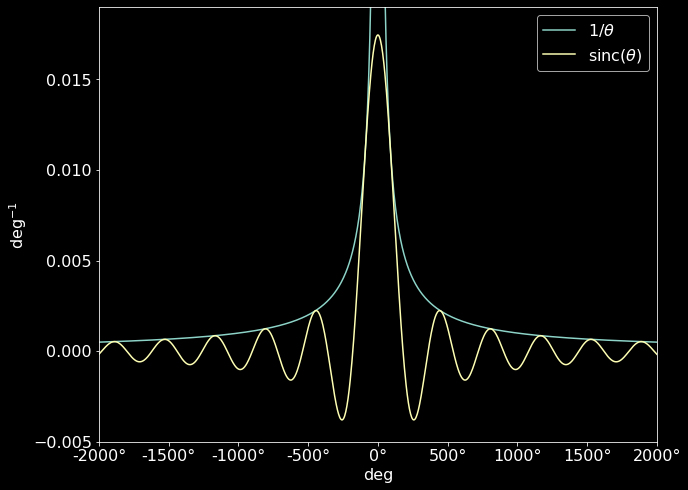

In [17]:
theta = np.linspace(-2000*u.deg, 2000*u.deg, 1000)
_=pl.plot(theta, 1/np.abs(theta), label=r'$1/\theta$')
_=pl.plot(theta, np.sin(theta)/theta, label=r'sinc($\theta$)')
_=pl.axis([-2000,2000,-0.005,0.019])
_=pl.legend()

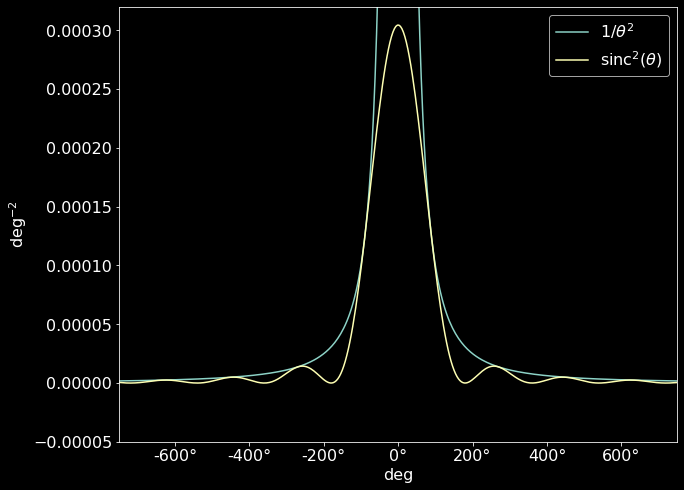

In [18]:
_=pl.plot(theta, 1/np.abs(theta)**2, label=r'$1/\theta^2$')
_=pl.plot(theta, (np.sin(theta)/theta)**2, label=r'sinc$^2$($\theta$)')
_=pl.axis([-750,750,-0.00005,0.00032])
_=pl.legend()

# Spectral Intensity Distribution

The intensity distribution produced by a grating spectrograph consists of the convolution between the gap width's sinc$^2$ function and the grating intensity function.

We can use it to predict where the light will appear and therefore determine what the resolution of our instrument will be.


We define variables:

* $a$ is the width of a gap (line) in the grating
* $D$ is the separation between gaps (lines)
* $\alpha =  (\pi a / \lambda)\sin \theta$
* $\beta = (\pi D / \lambda)\sin \theta$
* $N$ is the number of lines on the grating


$$I = I_0 \left(\frac{\sin \alpha}{\alpha} \right)^2 \left(\frac{\sin (N \beta)}{\sin \beta}\right)^2$$

The above can be derived by Fourier transforming the grating transmission pattern, but for now we will accept it as provided.

## Spectral Intensity Distribution Zeroes

A definition of 'resolution' is when the valley from one interference peak aligns with the zenith of an adjacent peak.  In imaging, we refer to this as the Rayleigh criterion.



We therefore need the zeros of our intensity distribution:
$$I = I_0 \left(\frac{\sin \alpha}{\alpha} \right)^2 \left(\frac{\sin (N \beta)}{\sin \beta}\right)^2$$

This pattern is usefully zero when $\sin N \beta = 0$  (remember the definition above: 𝛽=(𝜋𝐷/𝜆)sin𝜃). 

We're not interested in $\alpha=0$ or $\theta=0$; those both occur at 0 order and have no dispersion, so they have no resolution.


$\sin (N \beta) = 0$ when this equation holds:

$$N \beta = n' \pi$$
since $\sin(n' \pi) = 0$ for all integers $n'$.




Bringing in the definition of $\beta$, 𝛽=(𝜋𝐷/𝜆)sin𝜃), we then have
$$ \frac{N \pi D}{ \lambda}  \sin \theta = n' \pi$$

Therefore, we have:
$$ \sin \theta_{zeroes} = \frac{\lambda n'}{N D}$$
where $n'=0,1,2,3$ is the integer number of the zero of the function.  

<img src="images/spectrograph_response_eightgap_zeros.png">

# Spectral Intensity Distribution to  Spectral Dispersion

The dispersion is how much the light gets spread out in angle as a function of wavelength.

We can get it by taking the derivative $\frac{d}{d n'}$ of our function that gives us the zeros:
$$ \sin \theta_{zeroes} = \frac{\lambda n'}{N D}$$


We take the derivative of $$ \sin \theta_{zeroes} = \frac{\lambda n'}{N D}$$

to obtain
$$ \cos \theta \frac{d \theta}{d n'} = \frac{\lambda}{N D}$$

We then need to replace $\frac{d \theta}{d n'}$.

The angular separation from one zero to the next is $$\frac{\Delta \theta}{\Delta n'}$$

We note that the quantized version can be written as a differential
$$ \frac{\Delta \theta}{\Delta n'}= \frac{d\theta}{d n'}$$ and then observe that our quantized $\Delta n' = 1$ ("the next" is 1 away) to obtain $$\Delta \theta = \frac{d \theta}{d n'}$$


The derivative of the zeros equation,
$$ \cos \theta \frac{d \theta}{d n'} = \frac{\lambda}{N D}$$
rearranges, using $\Delta \theta = \frac{d \theta}{d n'}$, to
$$ \Delta \theta = \frac{\lambda}{N D \cos \theta}$$

## Angular Dispersion: The angle between one zero and the next $$ \Delta \theta = \frac{\lambda}{N D \cos \theta}$$
Again, for $\theta \approx 0$, $\cos \theta \approx 1$, so
$$ \Delta \theta \approx \frac{\lambda}{N D}$$

Recall definitions:
* $D$ is the separation between gaps (lines)
* $N$ is the number of lines on the grating


What we're most interested in, though, is the separation between different *wavelengths*.

We showed [earlier](#Grating-Equation:-Dispersion) that 
$$ \frac{d  \theta}{d\lambda} = \frac{n}{D \cos \theta}$$
and we can use
$$ \frac{\Delta \theta}{\Delta \lambda} = \frac{d \theta}{d \lambda}$$

and 
$$ \Delta \theta \approx \frac{\lambda}{N D}$$


to obtain
$$ \Delta \lambda = \frac{\Delta \theta D \cos \theta }{n } = \frac{\lambda}{Nn}$$

# Spectral Resolution of a Grating

$$ \Delta \lambda = \frac{\lambda}{N n}$$

$$ R = \frac{\lambda}{\Delta \lambda} = Nn$$

* $\Delta \lambda$ is the wavelength difference we can resolve
* $\lambda$ is the wavelength we observe
* $N$ is the number of lines on the grating
* $n$ is the order number


The spectral resolution of a full spectrograph is more complicated than this, however.  The resolving power, or resolution, $R$ is the diffraction limit. In practice, we also need to consider the image size, which is set by the slit size.

# Image of the Slit
<img src="images/reflectiongrating_whitebg_littlefair.png">

# Slit Size

A reimager has effective focal length $f_{cam}$, so $s = f_{cam} \sin \theta$: this is the size of the slit image.

If the slit image is bigger than the separation between two wavelengths, the wavelengths overlap and blur out.

So we need to compare the size of the image of the slit to the separation between zeroes from the grating.  Whichever is larger is our limiting quantity.

# Resolution Limit

We have the dispersion equation:
$$ \frac{\Delta x_{wavelength}}{\Delta \lambda} =  \frac{ f_{cam} n }{D}$$

and the image size equation:
$$ x_{image} = f_{camera} \sin \theta_{slit} $$

If the image size $x_{image}$ is bigger than the wavelength separation $\Delta x_{wavelength}$, the resolution is slit-limited.  Otherwise, the resolution is diffraction-limited.

Taking our previous two equations, we set $\Delta x_{wavelength} = x_{image}$ to get:

$$\frac{f_{cam} n \Delta \lambda}{D} = f_{cam} \sin \theta_{slit}$$

The $f_{cam}$'s cancel out, so...

To be diffraction-limited, the spectrograph must have a slit angular size smaller than the angular dispersion of the grating such that, following the grating equation ($\sin \theta_{grating} = n \lambda / D$), 
$$ \sin \theta_{slit} < \frac{n \Delta \lambda}{D}$$

## Resolution Limit: Our slit image must be smaller than $\theta_{slit}$ for the spectrum to be diffraction-limited
$$ \sin \theta_{slit} < \frac{n \Delta \lambda}{D}$$

Let's take an example:

* First order: $n=1$ 
* Line separation: $D=3$ microns
* Grating size: $x_{grating} = 30$ mm
* Wavelength: $\lambda=500$ nm
* Number of lines: $N = x_{grating} / D = 10000$
* From $\frac{\lambda}{\Delta \lambda} = Nn$, we have $\Delta \lambda = \lambda / 10000 = 0.05 \mathrm{nm} = 0.5 $ angstrom 

To match the diffraction limit, we need $\sin \theta_{slit} < \frac{0.5 \mathrm{A}}{3 \mu\mathrm{m}}  $  

In [19]:
np.arcsin(0.5*u.angstrom / (3*u.um)).to(u.arcsec)

<Quantity 3.43774677 arcsec>

So as long as the slit width is narrower than ~3.5", the spectrum will be limited by diffraction.

Let's take another example:

* Second order: $n=2$ 
* Line separation: $D=6$ microns
* Grating size: $x_{grating} = 60$ mm
* Wavelength: $\lambda=500$ nm
* Number of lines: $N = x_{grating} / D = 10000$
* From $\frac{\lambda}{\Delta \lambda} = Nn$, we have $\Delta \lambda = \lambda / 20000 = 0.025 \mathrm{nm} = 0.25 $ angstrom 

To match the diffraction limit, we need $\sin \theta_{slit} < \frac{0.25 \mathrm{A}}{6 \mu\mathrm{m}}  $ 

In [20]:
np.arcsin(0.25*u.angstrom / (6*u.um)).to(u.arcsec)

<Quantity 0.85943669 arcsec>

In this case, we need the slit to be 0.85" or narrower to achieve the spectrograph's diffraction limit.

This poses a problem: our *seeing limit* is about 2".

If we make a slit smaller than the seeing, we experience *slit loss*: we lose some of the light.

<img src="images/ringspectrum_littlefair.png">

<img src="images/wfpc2-stis.jpg">

<img src="images/wfpc2-stis-narrowslit.jpg">

Rule of thumb for spectrograph design:

You want to have

$$ \sin \theta_{slit} = \frac{n \Delta \lambda}{D}$$

If you assume $\theta_{slit}$ is going to be about the seeing limit, set the parameters of the spectrograph so that the diffraction limit is about the same size.

# Check out the Grating Simulation Widget

[Widget link](SpectrographDesignInteractiveWidget.ipynb)

fin